# **Data Preprocessing**

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

**Follwing are the ML steps I've performed on the ISBSG Datset**

**Step 1 :** Import the libraries
 
**Step 2 :** Import the data-set

**Step 3 :** Check out the missing values

**Step 4 :** See the Numerical & Categorical Values

**Step 5 :** Apply Correlation

**Step 6 :** Selection Of Features and Label

**Step 7 :** Splitting the data-set into Training and Testing Set

**Step 8 :** Apply Regression Models

**Step 9 :** Creating A DataFrame and Display All models Score - R-Squared (R²) 

**Step 10:**  Evaluation Metrics (MAE, MSE, RMSE)

**Step 1 : Import the libraries**



In [1]:
import pandas as pd   #data analysis (load data)   

**Step 2 : Import the dataset**

In [2]:
df=pd.read_csv('newlyGenerated.csv') #Importing Dataset in to df Dataframe Using Pandas
df.head() #Displaying top 5 Rows Using Head Function for DataFrame

,Unnamed: 0,Project ID,Data Quality Rating,UFP rating,Year of Project,Count Approach,Functional Size,Adjusted Function Points,Value Adjustment Factor,Normalised Work Effort Level 1,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
0,2,10001,D,A,1998.0,NESMA,237.0,254.0,NaN,1850.0,...,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,10011,B,A,1996.0,IFPUG,443.0,443.0,NaN,856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,10012,B,A,2002.0,IFPUG,76.0,74.0,0.98,1100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,10014,B,A,2004.0,IFPUG,3.0,3.0,1.09,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,10015,B,A,2000.0,IFPUG,382.0,478.0,1.25,NaN,...,35.0,347.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True) # Drop Scrap Columns
df.shape #Display The Shape Of Dataframe

(5052, 118)

**Step 3 : Check out the missing values**

In [4]:
for i in df.columns:# This loop will iterate all columns and find the total number of missing values
    print('Columns name: ',i,' ',df[i].isnull().sum())

Columns name:  Project ID   0
Columns name:  Data Quality Rating   0
Columns name:  UFP rating   540
Columns name:  Year of Project   16
Columns name:  Count Approach   0
Columns name:  Functional Size   1479
Columns name:  Adjusted Function Points   200
Columns name:  Value Adjustment Factor   3257
Columns name:  Normalised Work Effort Level 1   435
Columns name:  Normalised Work Effort   18
Columns name:  Summary Work Effort   18
Columns name:  Normalised Level 1 PDR (ufp)   1866
Columns name:  Normalised PDR (ufp)   1495
Columns name:  Pre 2002 PDR (afp)   216
Columns name:  Defect Density   4292
Columns name:  Speed of Delivery   3753
Columns name:  Project Elapsed Time   823
Columns name:  Project Inactive Time   2791
Columns name:  Implementation Date   645
Columns name:  Project Activity Scope   2505
Columns name:  Effort Plan   4327
Columns name:  Effort Specify   3785
Columns name:  Effort Design   4363
Columns name:  Effort Build   3511
Columns name:  Effort Test   3608
Colum

<AxesSubplot:>

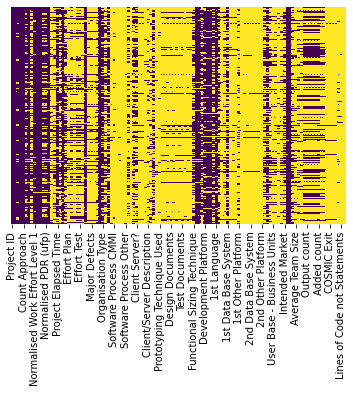

In [5]:
import seaborn as sns #Seaborn is a library for making statistical graphics in Python

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #Checking how many missing values are there in it

**Handling Missing Data With FFILL BFILL and Interpolate**

In [6]:
df.interpolate(inplace=True)# Fill the NaN valeus based on Specific Methods

In [7]:
df.bfill(inplace=True)# Fill the NaN Values based on the Upper Values in the Columns

In [8]:
df.ffill(inplace=True)# Fill the NaN Values based on the Lower Values in the Columns

In [9]:
df #Display the DataFrame

,Project ID,Data Quality Rating,UFP rating,Year of Project,Count Approach,Functional Size,Adjusted Function Points,Value Adjustment Factor,Normalised Work Effort Level 1,Normalised Work Effort,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
0,10001,D,A,1998.0,NESMA,237.0,254.0,0.98,1850.0,1850.0,...,237.00,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
1,10011,B,A,1996.0,IFPUG,443.0,443.0,0.98,856.0,856.0,...,186.50,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
2,10012,B,A,2002.0,IFPUG,76.0,74.0,0.98,1100.0,1100.0,...,136.00,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
3,10014,B,A,2004.0,IFPUG,3.0,3.0,1.09,28.0,28.0,...,85.50,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
4,10015,B,A,2000.0,IFPUG,382.0,478.0,1.25,9094.0,23913.0,...,35.00,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,32748,B,A,2001.0,IFPUG,902.0,767.0,0.85,3748.0,22478.0,...,815.75,30.857143,0.0,16.050847,10.525424,7.593220,8.525424,300000,LOC Count Method Manual,800398.0
5048,32755,B,A,2002.0,IFPUG,197.0,230.0,1.17,1214.0,1214.0,...,583.50,20.571429,0.0,16.288136,10.644068,7.694915,8.644068,300000,LOC Count Method Manual,800398.0
5049,32757,B,A,1998.0,IFPUG,291.0,291.0,1.00,710.0,960.0,...,351.25,10.285714,0.0,16.525424,10.762712,7.796610,8.762712,300000,LOC Count Method Manual,800398.0
5050,32758,B,A,1995.0,IFPUG,119.0,127.0,1.07,385.0,2312.0,...,119.00,0.000000,0.0,16.762712,10.881356,7.898305,8.881356,300000,LOC Count Method Manual,800398.0


<AxesSubplot:>

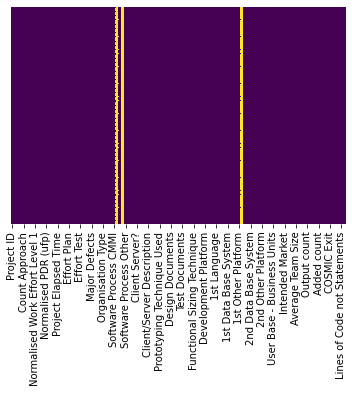

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #Checking how many missing values are there in it

**Droping These Columns Because they all are None**

In [11]:
df.drop(['Software Process SPICE','Software Process TICKIT','2nd Hardware'],axis=1)# Eliminate the NaN Columns

,Project ID,Data Quality Rating,UFP rating,Year of Project,Count Approach,Functional Size,Adjusted Function Points,Value Adjustment Factor,Normalised Work Effort Level 1,Normalised Work Effort,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
0,10001,D,A,1998.0,NESMA,237.0,254.0,0.98,1850.0,1850.0,...,237.00,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
1,10011,B,A,1996.0,IFPUG,443.0,443.0,0.98,856.0,856.0,...,186.50,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
2,10012,B,A,2002.0,IFPUG,76.0,74.0,0.98,1100.0,1100.0,...,136.00,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
3,10014,B,A,2004.0,IFPUG,3.0,3.0,1.09,28.0,28.0,...,85.50,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
4,10015,B,A,2000.0,IFPUG,382.0,478.0,1.25,9094.0,23913.0,...,35.00,347.000000,0.0,68.000000,71.000000,12.000000,32.000000,1250,Unable to estimate,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,32748,B,A,2001.0,IFPUG,902.0,767.0,0.85,3748.0,22478.0,...,815.75,30.857143,0.0,16.050847,10.525424,7.593220,8.525424,300000,LOC Count Method Manual,800398.0
5048,32755,B,A,2002.0,IFPUG,197.0,230.0,1.17,1214.0,1214.0,...,583.50,20.571429,0.0,16.288136,10.644068,7.694915,8.644068,300000,LOC Count Method Manual,800398.0
5049,32757,B,A,1998.0,IFPUG,291.0,291.0,1.00,710.0,960.0,...,351.25,10.285714,0.0,16.525424,10.762712,7.796610,8.762712,300000,LOC Count Method Manual,800398.0
5050,32758,B,A,1995.0,IFPUG,119.0,127.0,1.07,385.0,2312.0,...,119.00,0.000000,0.0,16.762712,10.881356,7.898305,8.881356,300000,LOC Count Method Manual,800398.0


**Step 4 : See the Numerical & Categorical Values**

In [12]:
from sklearn.preprocessing import LabelEncoder #Use LabelEncoder class to convert Categorical data into numerical one

In [13]:
categ = ['User Base - Locations','User Base - Business Units','User Base - Distinct Users', 'User Base - Concurrent Users',
         'Ratio of Project Work Effort to Non-Project Activity', 'Data Quality Rating', 'UFP rating', 'Count Approach',
         'Implementation Date', 'Project Activity Scope', 'Development Type', 'Organisation Type', 'Business Area Type', 
         'Application Type','Software Process CMM','Software Process CMMI','Software Process ISO','Software Process Other',
         'Package Customisation', 'Degree of Customisation','Architecture','Client Server?','Client Roles','Server Roles',
         'Type of Server','Client/Server Description','Web Development','Development Techniques','JAD Technique Used',
         'Prototyping Technique Used','Planning Documents','Specification Documents','Specification Techniques','Design Documents',
         'Design Techniques','Build Products','Build Activity','Test Documents','Test Activity', 'Implement Documents',
         'Implement Activity','Functional Sizing Technique','FP Standard','FP Standards All','Reference Table Approach',
         'Development Platform','Language Type','Primary Programming Language','1st Hardware','1st Language','1st Operating System',
         'Integrated Development Environment','1st Debugging Tool','1st Data Base System','1st Component Server','1st Web Server',
         '1st Message Server','1st Other Platform','2nd Language','2nd Operating System','2nd Data Base System','2nd Component Server','2nd Web Server','2nd Message Server','2nd Other Platform','CASE Tool Used','Used Methodology',
         'How Methodology Acquired', 'Intended Market', 'Recording Method','Percentage of Uncollected Work Effort', 'Lines of Code',
         'Lines of Code not Statements']


# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

**Step 5 : Apply Correlation**

# Correlation

In [14]:
df.corr() #simple used to find the pairwise correlation of all columns in the dataframe

,Project ID,Data Quality Rating,UFP rating,Year of Project,Count Approach,Functional Size,Adjusted Function Points,Value Adjustment Factor,Normalised Work Effort Level 1,Normalised Work Effort,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
Project ID,1.000000,-0.019340,0.018742,-0.004810,-0.008848,0.020663,0.014650,-0.041476,-0.014213,0.006989,...,-0.021029,0.034197,0.032546,-0.212353,-0.205810,-0.123194,-0.133586,-0.029759,-0.011869,0.724785
Data Quality Rating,-0.019340,1.000000,0.217649,0.121212,0.014854,0.064752,0.073157,0.010826,0.002187,0.060454,...,0.037978,0.066022,0.033302,0.019695,0.015469,0.012615,0.000211,-0.011252,-0.001513,-0.009608
UFP rating,0.018742,0.217649,1.000000,0.331959,-0.149652,-0.009413,-0.002300,-0.022024,-0.066222,0.002770,...,-0.003754,-0.006075,0.011258,0.003200,0.002115,-0.002824,0.000737,0.000830,-0.006285,0.016402
Year of Project,-0.004810,0.121212,0.331959,1.000000,-0.164900,-0.118546,-0.152930,0.090003,-0.072421,-0.091167,...,-0.062613,-0.019996,-0.017987,0.003834,-0.003584,0.006939,0.018177,0.030101,-0.026257,-0.022100
Count Approach,-0.008848,0.014854,-0.149652,-0.164900,1.000000,0.045160,0.048038,-0.021937,0.022498,0.078400,...,0.012137,0.013851,0.009634,0.015238,0.013233,0.022239,0.008789,-0.005968,0.001675,-0.009154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COSMIC Read,-0.123194,0.012615,-0.002824,0.006939,0.022239,0.022011,0.016814,-0.014041,-0.001862,-0.005399,...,0.044593,0.138510,0.039978,0.593283,0.622354,1.000000,0.835269,0.071749,-0.079130,-0.019774
COSMIC Write,-0.133586,0.000211,0.000737,0.018177,0.008789,0.005994,0.011557,0.015703,-0.014053,-0.016899,...,0.038938,0.004966,0.054061,0.576256,0.567769,0.835269,1.000000,0.047334,-0.026824,0.021926
Lines of Code,-0.029759,-0.011252,0.000830,0.030101,-0.005968,-0.024612,-0.014904,-0.056713,0.012660,-0.014501,...,-0.047033,0.051646,-0.001756,0.031271,-0.006132,0.071749,0.047334,1.000000,-0.009965,-0.037244
Lines of Code not Statements,-0.011869,-0.001513,-0.006285,-0.026257,0.001675,-0.028860,-0.012513,-0.020849,0.007603,0.002724,...,-0.065715,-0.049146,-0.009832,-0.002442,0.012962,-0.079130,-0.026824,-0.009965,1.000000,0.035695


In [15]:
corr= df.corr(method='pearson') #for normal data

In [16]:
corr #show correlation of PERASON which I stored in CORR 

,Project ID,Data Quality Rating,UFP rating,Year of Project,Count Approach,Functional Size,Adjusted Function Points,Value Adjustment Factor,Normalised Work Effort Level 1,Normalised Work Effort,...,Added count,Changed count,Deleted count,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Lines of Code,Lines of Code not Statements,Other Size Units
Project ID,1.000000,-0.019340,0.018742,-0.004810,-0.008848,0.020663,0.014650,-0.041476,-0.014213,0.006989,...,-0.021029,0.034197,0.032546,-0.212353,-0.205810,-0.123194,-0.133586,-0.029759,-0.011869,0.724785
Data Quality Rating,-0.019340,1.000000,0.217649,0.121212,0.014854,0.064752,0.073157,0.010826,0.002187,0.060454,...,0.037978,0.066022,0.033302,0.019695,0.015469,0.012615,0.000211,-0.011252,-0.001513,-0.009608
UFP rating,0.018742,0.217649,1.000000,0.331959,-0.149652,-0.009413,-0.002300,-0.022024,-0.066222,0.002770,...,-0.003754,-0.006075,0.011258,0.003200,0.002115,-0.002824,0.000737,0.000830,-0.006285,0.016402
Year of Project,-0.004810,0.121212,0.331959,1.000000,-0.164900,-0.118546,-0.152930,0.090003,-0.072421,-0.091167,...,-0.062613,-0.019996,-0.017987,0.003834,-0.003584,0.006939,0.018177,0.030101,-0.026257,-0.022100
Count Approach,-0.008848,0.014854,-0.149652,-0.164900,1.000000,0.045160,0.048038,-0.021937,0.022498,0.078400,...,0.012137,0.013851,0.009634,0.015238,0.013233,0.022239,0.008789,-0.005968,0.001675,-0.009154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COSMIC Read,-0.123194,0.012615,-0.002824,0.006939,0.022239,0.022011,0.016814,-0.014041,-0.001862,-0.005399,...,0.044593,0.138510,0.039978,0.593283,0.622354,1.000000,0.835269,0.071749,-0.079130,-0.019774
COSMIC Write,-0.133586,0.000211,0.000737,0.018177,0.008789,0.005994,0.011557,0.015703,-0.014053,-0.016899,...,0.038938,0.004966,0.054061,0.576256,0.567769,0.835269,1.000000,0.047334,-0.026824,0.021926
Lines of Code,-0.029759,-0.011252,0.000830,0.030101,-0.005968,-0.024612,-0.014904,-0.056713,0.012660,-0.014501,...,-0.047033,0.051646,-0.001756,0.031271,-0.006132,0.071749,0.047334,1.000000,-0.009965,-0.037244
Lines of Code not Statements,-0.011869,-0.001513,-0.006285,-0.026257,0.001675,-0.028860,-0.012513,-0.020849,0.007603,0.002724,...,-0.065715,-0.049146,-0.009832,-0.002442,0.012962,-0.079130,-0.026824,-0.009965,1.000000,0.035695


In [17]:
corr.style.background_gradient(cmap='coolwarm')

G:\ANACONDA installation\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
G:\ANACONDA installation\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [18]:
corr.drop(['Prototyping Technique Used','JAD Technique Used','Software Process SPICE','Software Process TICKIT'],
          axis=1,inplace=True)

In [19]:
# find and choose correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.5)
print('correlated features: ', len(set(corr_features)) )

correlated features:  22


# Correlated Features

**Choose correlated features as coulmns**

In [20]:
features=[]
for i in corr_features:
    features.append(i)
features

['File count',
 'Output count',
 'COSMIC Read',
 'Effort Build',
 'Average Team Size',
 'Total Defects Delivered',
 'Effort Test',
 'Changed count',
 'Normalised Work Effort',
 '1st Language',
 'COSMIC Write',
 'Extreme Defects',
 'Added count',
 'Normalised PDR (ufp)',
 'COSMIC Exit',
 'Summary Work Effort',
 'Pre 2002 PDR (afp)',
 'FP Standards All',
 'Other Size Units',
 'Project Inactive Time',
 'Used Methodology',
 'Adjusted Function Points']

**Step 6 : Selection Of Features and Label**


In [21]:
X=df[features]
y=df['Summary Work Effort']

In [22]:
X.shape

(5052, 22)

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
X.head()

,File count,Output count,COSMIC Read,Effort Build,Average Team Size,Total Defects Delivered,Effort Test,Changed count,Normalised Work Effort,1st Language,COSMIC Write,Extreme Defects,Added count,Normalised PDR (ufp),COSMIC Exit,Summary Work Effort,Pre 2002 PDR (afp),FP Standards All,Other Size Units,Project Inactive Time,Used Methodology,Adjusted Function Points
0,42.00,110.00,12.0,1000.000000,5.000000,5.000000,200.000000,347.0,1850.0,546,32.0,0.0,237.0,7.8,71.0,1850.0,7.3,93,224.0,0.0,1,254.0
1,33.25,84.25,12.0,1155.333333,4.933333,5.368421,887.333333,347.0,856.0,16,32.0,0.0,186.5,1.9,71.0,796.0,1.8,0,224.0,0.0,0,443.0
2,24.50,58.50,12.0,1310.666667,4.866667,5.736842,1574.666667,347.0,1100.0,211,32.0,0.0,136.0,14.5,71.0,1100.0,14.9,48,224.0,0.0,2,74.0
3,15.75,32.75,12.0,1466.000000,4.800000,6.105263,2262.000000,347.0,28.0,297,32.0,0.0,85.5,9.3,71.0,28.0,9.3,57,224.0,0.0,2,3.0
4,7.00,7.00,12.0,1621.333333,4.733333,6.473684,2949.333333,347.0,23913.0,297,32.0,0.0,35.0,62.6,71.0,22000.0,46.0,51,224.0,0.0,2,478.0


**Step 7 : Splitting the data-set into Training and Test Set**


#### When do you need to split your dataset?

##### Splitting the data into training and testing steps should happen before feature engineering. Otherwise, you can end up with data leakage, where information from the testing set is contained in the training set. This is a type of "cheating" which will increase the apparent performance of the model and give you a false sense that the model is better at predicting than it really is

In [25]:
X.drop("Summary Work Effort",axis=1, inplace=True)

G:\ANACONDA installation\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
X.shape

(5052, 21)

**Step 7 : Splitting the data-set into Training and Test Set**

When do you need to split your dataset?

Splitting the data into training and testing steps should happen before feature engineering. Otherwise, you can end up with data leakage, where information from the testing set is contained in the training set. This is a type of "cheating" which will increase the apparent performance of the model and give you a false sense that the model is better at predicting than it really is.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [28]:
X_train

,File count,Output count,COSMIC Read,Effort Build,Average Team Size,Total Defects Delivered,Effort Test,Changed count,Normalised Work Effort,1st Language,COSMIC Write,Extreme Defects,Added count,Normalised PDR (ufp),COSMIC Exit,Pre 2002 PDR (afp),FP Standards All,Other Size Units,Project Inactive Time,Used Methodology,Adjusted Function Points
1025,47.250000,32.250000,118.176471,1640.800000,3.755556,0.000000,450.500000,398.444444,500.0,8,25.647059,0.000000,246.500000,56.50,152.529412,12.8,57,224.000000,0.000000,2,39.0
463,45.000000,25.000000,9.590909,2228.000000,3.044444,8.142857,3483.000000,105.453333,10637.0,254,23.181818,1.000000,99.000000,107.40,27.818182,92.9,60,224.000000,0.000000,2,103.0
3826,62.500000,68.500000,92.067797,680.666667,7.333333,25.333333,354.666667,22.333333,6221.0,519,71.694915,0.222222,255.500000,54.10,30.305085,36.2,51,85300.420118,0.000000,2,115.0
1272,3.500000,32.000000,192.562500,2588.400000,20.750000,8.666667,1172.800000,148.333333,1374.0,443,187.187500,0.920000,70.000000,5.90,107.718750,9.1,57,224.000000,0.000000,0,151.0
3950,166.000000,123.000000,119.000000,2257.600000,6.350000,6.333333,575.000000,451.000000,4810.0,618,57.500000,2.600000,0.000000,10.70,111.000000,10.7,0,183172.495069,0.000000,2,451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,57.454545,73.454545,61.260870,645.200000,5.650000,0.000000,878.000000,67.142857,1762.0,5,2.869565,0.000000,178.000000,31.50,38.304348,31.5,50,558874.976331,0.000000,2,56.0
466,28.714286,16.000000,8.727273,1650.000000,3.411111,6.857143,845.000000,64.973333,150.0,97,17.454545,1.000000,56.571429,3.50,28.545455,3.5,47,224.000000,6.560000,0,43.0
3092,164.888889,206.000000,15.650000,4516.285714,12.375000,2.000000,3259.714286,89.000000,902.0,2,8.975000,0.000000,622.000000,11.65,35.600000,3.8,57,101.410365,0.007143,2,236.0
3772,239.000000,121.400000,40.813559,2725.000000,8.625000,0.250000,1978.000000,184.800000,6802.0,446,32.338983,0.000000,409.800000,12.20,15.661017,11.1,10,42678.710059,1.250000,2,556.0


In [29]:
X_test

,File count,Output count,COSMIC Read,Effort Build,Average Team Size,Total Defects Delivered,Effort Test,Changed count,Normalised Work Effort,1st Language,COSMIC Write,Extreme Defects,Added count,Normalised PDR (ufp),COSMIC Exit,Pre 2002 PDR (afp),FP Standards All,Other Size Units,Project Inactive Time,Used Methodology,Adjusted Function Points
4712,24.000000,149.000000,85.777778,2173.666667,3.550000,7.000000,163.333333,177.000000,1694.0,306,28.488889,0.000000,76.000000,6.700000,89.911111,6.7,37,784612.181460,1.000000,2,253.0
691,51.000000,19.666667,361.255474,1592.714286,4.909091,10.312500,6465.857143,58.000000,1214.0,443,316.715328,2.000000,257.333333,6.866667,312.671533,6.9,57,224.000000,18.666667,1,176.0
65,10.000000,72.000000,154.158879,4250.200000,17.188889,4.000000,406.181818,74.750000,362.0,97,87.121495,0.000000,80.000000,11.400000,226.887850,8.2,30,224.000000,1.000000,2,44.0
2351,30.800000,75.325000,21.543478,362.333333,2.487500,2.666667,32.666667,5.750000,405.0,8,15.869565,31.000000,467.765000,9.740000,66.891304,6.3,29,153.979184,0.000000,2,64.0
4684,491.000000,166.000000,70.222222,3811.230769,2.075000,0.000000,647.153846,1065.666667,4316.0,2,29.111111,0.000000,380.500000,7.700000,52.888889,15.7,57,762512.035503,2.285714,2,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,50.555556,39.777778,16.500000,924.000000,9.615385,4.000000,679.000000,160.900000,1960.0,10,9.250000,0.000000,202.222222,1.600000,35.750000,1.6,1,104.673747,0.000000,0,1238.0
1351,34.285714,29.714286,3.571429,560.000000,2.116129,7.000000,140.000000,110.285714,1392.0,710,3.571429,0.000000,1.714286,1.500000,56.857143,1.4,1,224.000000,0.000000,0,915.0
2653,31.000000,15.000000,22.589286,5062.666667,3.440000,12.000000,3460.000000,137.666667,1890.0,803,5.464286,0.000000,120.000000,15.800000,23.303571,12.8,51,132.554376,0.000000,2,128.0
3796,34.000000,10.500000,63.593220,611.428571,4.857143,0.000000,1337.285714,21.000000,7052.0,604,49.830508,0.000000,102.500000,20.700000,22.169492,19.4,48,61621.692308,0.000000,2,364.0


**Step 8 : Regression Models**

# LinearRegression

log only allows positive values, and lets you choose how to handle negative ones (mask or clip).

symlog means symmetrical log, and allows positive and negative values.

symlog allows to set a range around zero within the plot will be linear instead of logarithmic.

      Actual  LR Predicted
4712  1694.0   1647.442834
691   1214.0   1166.168990
65     362.0    716.212945
2351   405.0    367.008624
4684  4316.0   4278.241895
...      ...           ...
3046  1960.0   1764.744579
1351  1295.0   1429.047481
2653  1644.0   1585.265053
3796  7052.0   6543.898078
3984  1562.0     32.773440

[1011 rows x 2 columns]


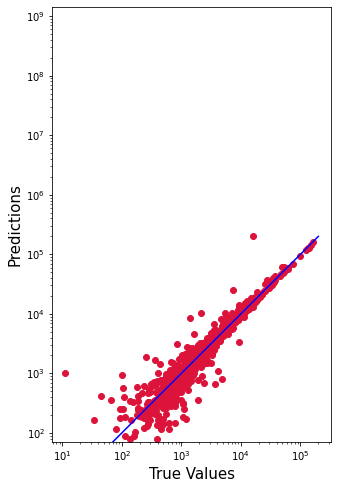

In [55]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lr_model=LinearRegression()
lr_model.fit(X_train,y_train) #training algorithm

#it’s time to make some predictions.
#we will use our test data and see how accurately our algorithm predicts the percentage score.
predicted_value=lr_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'LR Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(5,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Gradient Boosting 

      Actual  GB Predicted
4712  1694.0   1619.314857
691   1214.0   1097.168008
65     362.0    367.058194
2351   405.0    394.717456
4684  4316.0   3992.697425
...      ...           ...
3046  1960.0   1826.426899
1351  1295.0   1213.503849
2653  1644.0   1722.561518
3796  7052.0   6213.505553
3984  1562.0   1458.981159

[1011 rows x 2 columns]


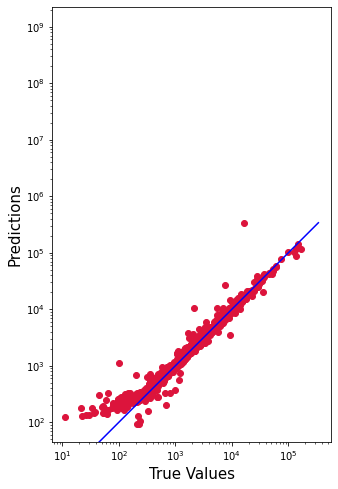

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
gb_model.score(X_test,y_test)
predicted_value=gb_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'GB Predicted':predicted_value})
print(comparison)

plt.figure(figsize=(5,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Random Forest

      Actual  RF Predicted
4712  1694.0       1649.38
691   1214.0       1072.18
65     362.0        352.37
2351   405.0        363.86
4684  4316.0       3964.55
...      ...           ...
3046  1960.0       1804.25
1351  1295.0       1067.08
2653  1644.0       1815.63
3796  7052.0       6702.18
3984  1562.0       1513.85

[1011 rows x 2 columns]


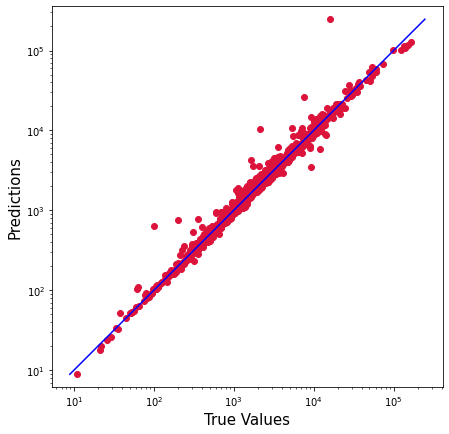

In [32]:
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=43)      
rf_model = rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

predicted_value=rf_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'RF Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Decision Tree Regression

      Actual  DT Predicted
4712  1694.0   1701.411765
691   1214.0   1160.415094
65     362.0    338.142857
2351   405.0    268.000000
4684  4316.0   4048.053333
...      ...           ...
3046  1960.0   1950.225806
1351  1295.0    890.000000
2653  1644.0   1805.223214
3796  7052.0   6884.095238
3984  1562.0   1555.036585

[1011 rows x 2 columns]


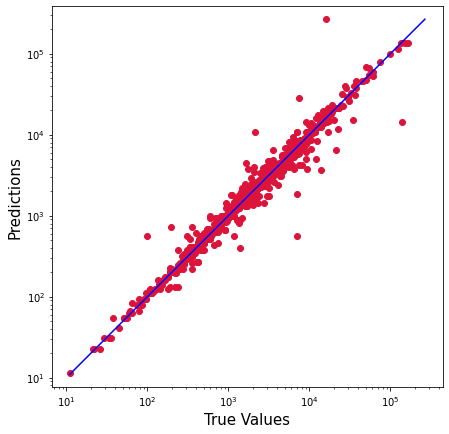

In [33]:
from sklearn.tree import DecisionTreeRegressor
D_model=DecisionTreeRegressor(max_depth=12)
D_model.fit(X_train,y_train)
D_model.score(X_test,y_test)
predicted_value=D_model.predict(X_test)
true_value=y_test

comparison = pd.DataFrame({'Actual':true_value,'DT Predicted':predicted_value})
print(comparison)


plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Plotting

**Step 9 : Creating A DataFrame and Display All models Score**

In [56]:
lr_score=lr_model.score(X_test,y_test)
gb_score=gb_model.score(X_test,y_test)
rf_score=rf_model.score(X_test,y_test)
d_score=D_model.score(X_test,y_test)


Score=pd.DataFrame({'Linear Regression ':[lr_score],'Gradient Boosting':[gb_score],'Random Forest':[rf_score],'Decision Tree':[d_score]})
Score

,Linear Regression,Gradient Boosting,Random Forest,Decision Tree
0,0.775362,0.296324,0.630782,0.483626


In [35]:
names=[]

for i in Score.columns:
    names.append(i)

<BarContainer object of 4 artists>

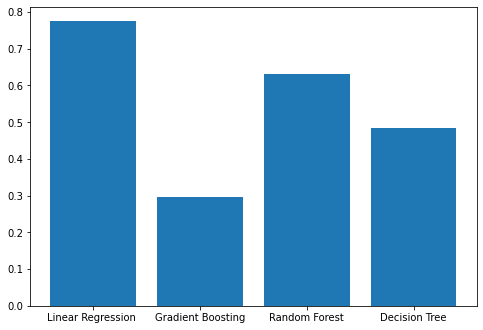

In [36]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.bar(names,Score.iloc[0].values)

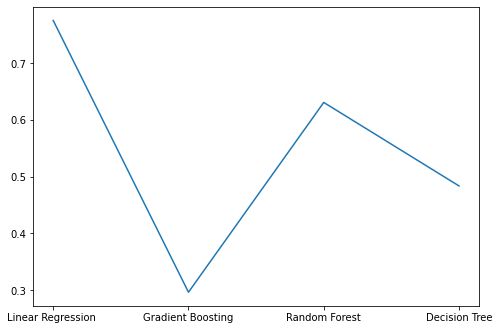

In [37]:
plt.plot(names,Score.iloc[0].values)

# R2

In [38]:
lr_score=lr_model.score(X_test,y_test)
gb_score=gb_model.score(X_test,y_test)
rf_score=rf_model.score(X_test,y_test)
d_score=D_model.score(X_test,y_test)

In [39]:
lr_pred=lr_model.predict(X_test)
gb_pred=gb_model.predict(X_test)
rf_pred=rf_model.predict(X_test)
d_pred=D_model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error
import numpy as np

In [41]:
lr_r2_score=r2_score(y_test, lr_pred)
gb_r2_score=r2_score(y_test,gb_pred)
rf_r2_score=r2_score(y_test,rf_pred)
d_r2_score=r2_score(y_test,d_pred)

In [42]:
r2_Score=pd.DataFrame({'Linear Regression ':[lr_r2_score],'Gradient Boosting Tree':[gb_r2_score],'Random Forest':[rf_r2_score],'Decision Tree':[d_r2_score]})
r2_Score

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,0.775362,0.296324,0.630782,0.483626


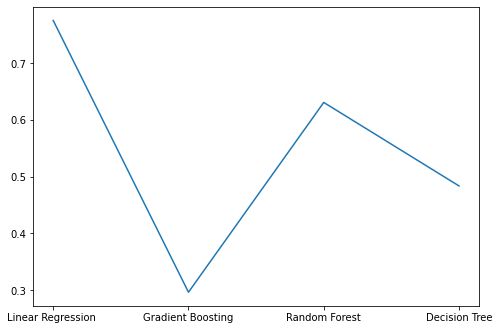

In [43]:
plt.plot(names,r2_Score.iloc[0].values)

**Step 10: Evaluation Metrics  (MAE, MSE, RMSE)**

**MAE (Mean Absolute Error)**

In [44]:
lr_mae=(mean_absolute_error(lr_pred, y_test))  #y_pred (predicted_value)
gb_mae=(mean_absolute_error(gb_pred, y_test))  #y_pred (predicted_value)
rf_mae=(mean_absolute_error(rf_pred, y_test))  #y_pred (predicted_value)
d_mae=(mean_absolute_error(d_pred, y_test))  #y_pred (predicted_value)

In [45]:
mae=pd.DataFrame({'Linear Regression ':[lr_mae],'Gradient Boosting Tree':[gb_mae],'Random Forest':[rf_mae],'Decision Tree':[d_mae]})
mae

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,869.185671,946.929077,830.365826,986.898642


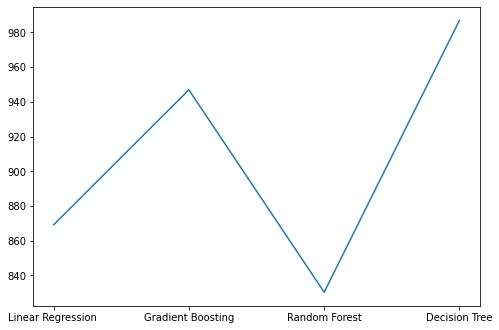

In [46]:
plt.plot(names,mae.iloc[0].values)

**MSE(Mean Squared Error)**

In [47]:
lr_mse=(mean_squared_error(lr_pred, y_test))
gb_mse=(mean_squared_error(gb_pred, y_test))
rf_mse=(mean_squared_error(rf_pred, y_test))
d_mse=(mean_squared_error(d_pred, y_test))

In [48]:
mse=pd.DataFrame({'Linear Regression ':[lr_mse],'Gradient Boosting Tree':[gb_mse],'Random Forest':[rf_mse],'Decision Tree':[d_mse]})
mse

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,3.570641e+07,1.118497e+08,5.868742e+07,8.207801e+07


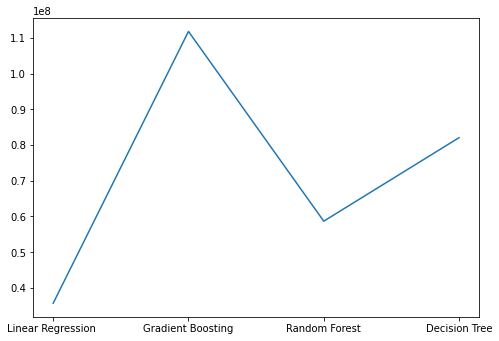

In [49]:
plt.plot(names,mse.iloc[0].values)

**RMSE (Root Mean Square Error)**

In [50]:
lr_rmse=np.sqrt(mean_squared_error(lr_pred, y_test))
gb_rmse=np.sqrt(mean_squared_error(gb_pred, y_test))
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
d_rmse=np.sqrt(mean_squared_error(d_pred, y_test))

In [51]:
rmse=pd.DataFrame({'Linear Regression ':[lr_rmse],'Gradient Boosting Tree':[gb_rmse],'Random Forest':[rf_rmse],'Decision Tree':[d_rmse]})
rmse

,Linear Regression,Gradient Boosting Tree,Random Forest,Decision Tree
0,5975.484092,10575.904057,7660.771387,9059.691249


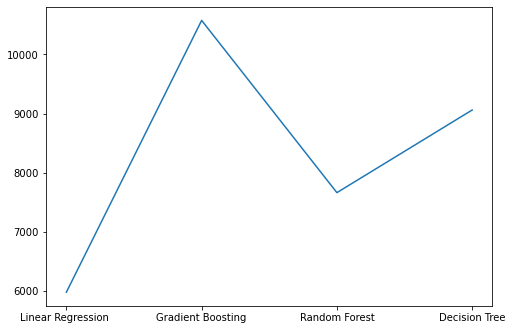

In [52]:
plt.plot(names,rmse.iloc[0].values)